In [1]:
import spaco
import anndata
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import squidpy as sq

## STARMAP

In [2]:
adata_cellbin = anndata.read("./data/imputation_well05.h5ad")
spatial = pd.read_csv("./data/well05_spatial.csv", index_col=0).iloc[1:,:]
adata_cellbin.obs = spatial.copy()
adata_cellbin.obsm['spatial'] = np.array(spatial.iloc[:,0:2].astype(float))

adata_cellbin_bkp = adata_cellbin.copy()

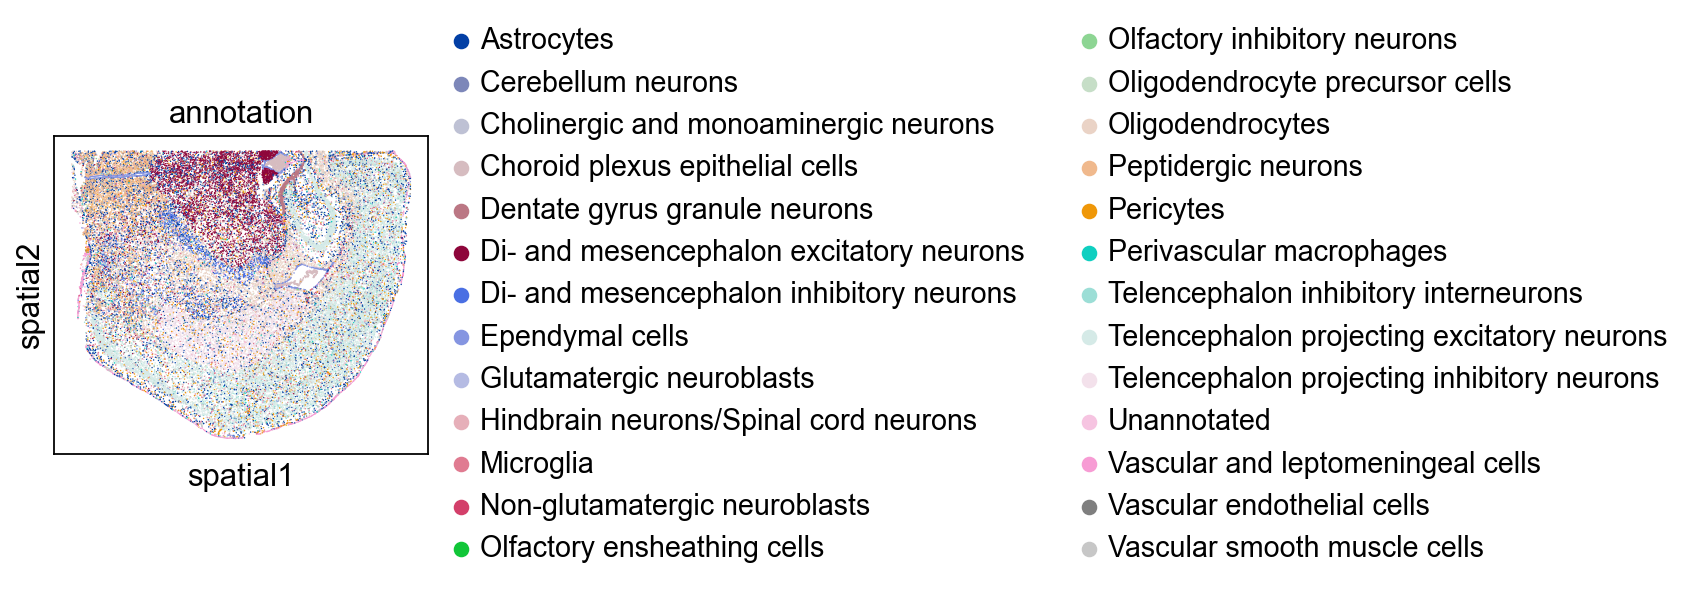

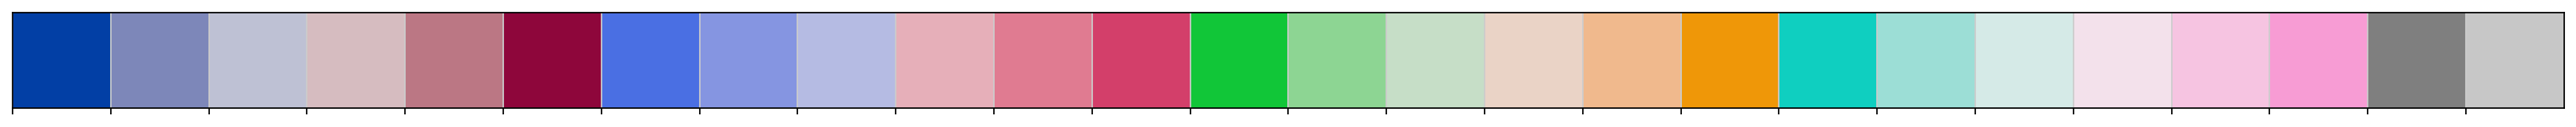

In [25]:
#--- cell_bin data

# Default colorization
sc.set_figure_params(figsize=(3,6), facecolor="white", dpi_save=300)
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=135)

# Get the above (default) color palette
palette_default = adata_cellbin.uns['annotation_colors'].copy()
sns.palplot(palette_default)

In [3]:

adata_cellbin = adata_cellbin_bkp.copy()

adata_cellbin.obs['annotation'] = adata_cellbin.obs['Main_molecular_cell_type'].copy()
adata_cellbin.obs['annotation'] = adata_cellbin.obs['annotation'].astype(str).astype('category')

min_cells=10
unique_tmp = np.unique(adata_cellbin.obs['annotation'],return_counts=True)
adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation'].isin(unique_tmp[0][unique_tmp[1]>min_cells])].copy()

adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation']!="Unannotated"].copy()

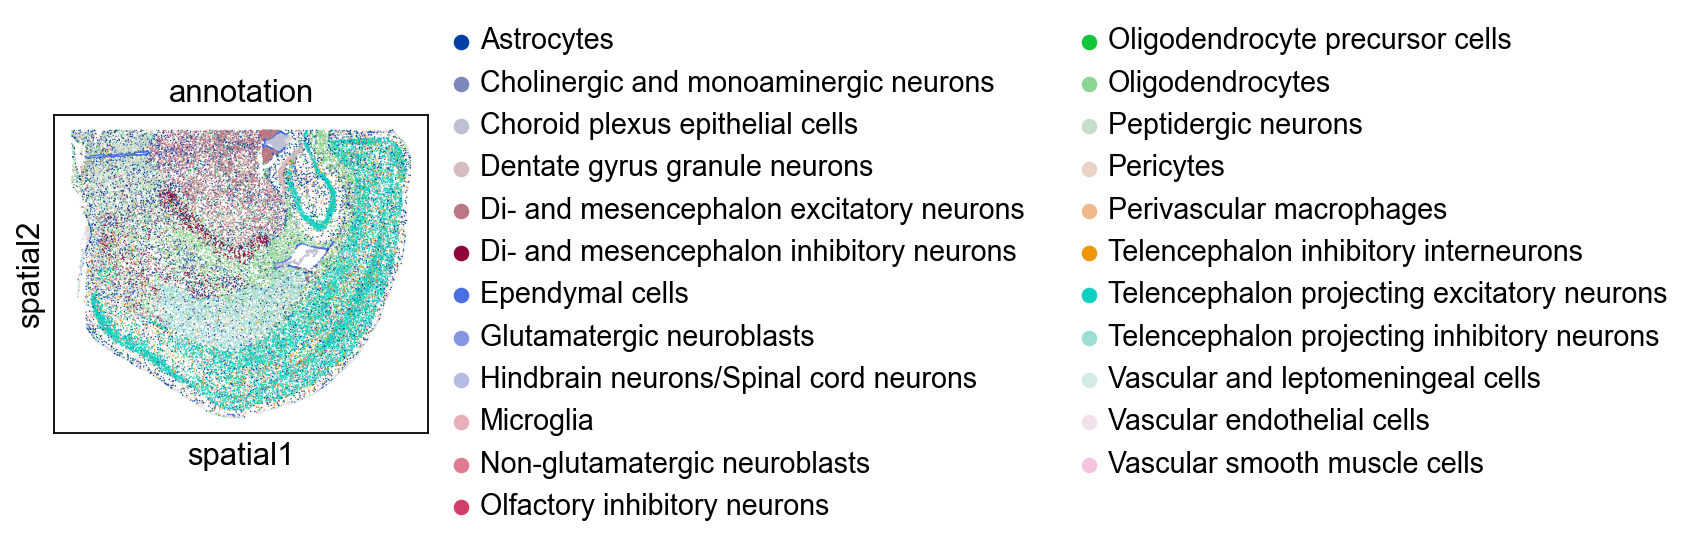

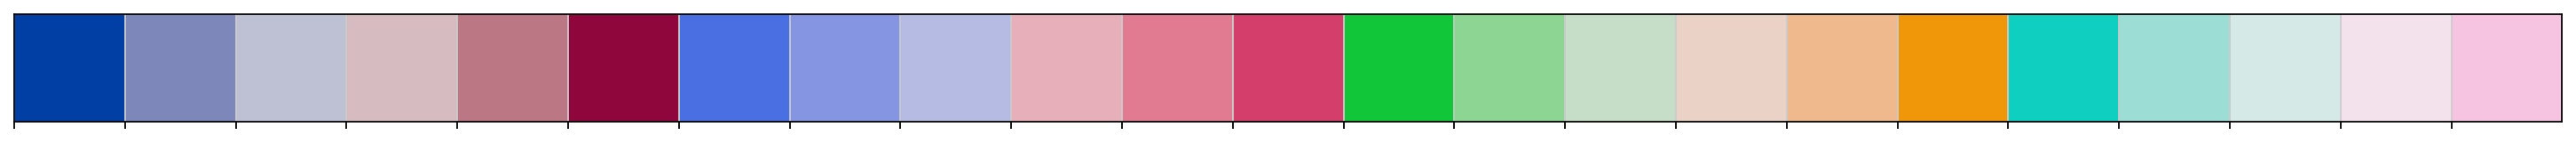

In [4]:
#--- cell_bin data

# Default colorization
sc.set_figure_params(figsize=(3,6), facecolor="white", dpi_save=300)
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=135)

# Get the above (default) color palette
palette_default = adata_cellbin.uns['annotation_colors'].copy()
sns.palplot(palette_default)

In [5]:
%%time
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    palette=palette_default, #有色板的
    radius=200,
    n_neighbors=30,
)
#color_mapping

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...
CPU times: user 10.6 s, sys: 605 ms, total: 11.2 s
Wall time: 10.9 s


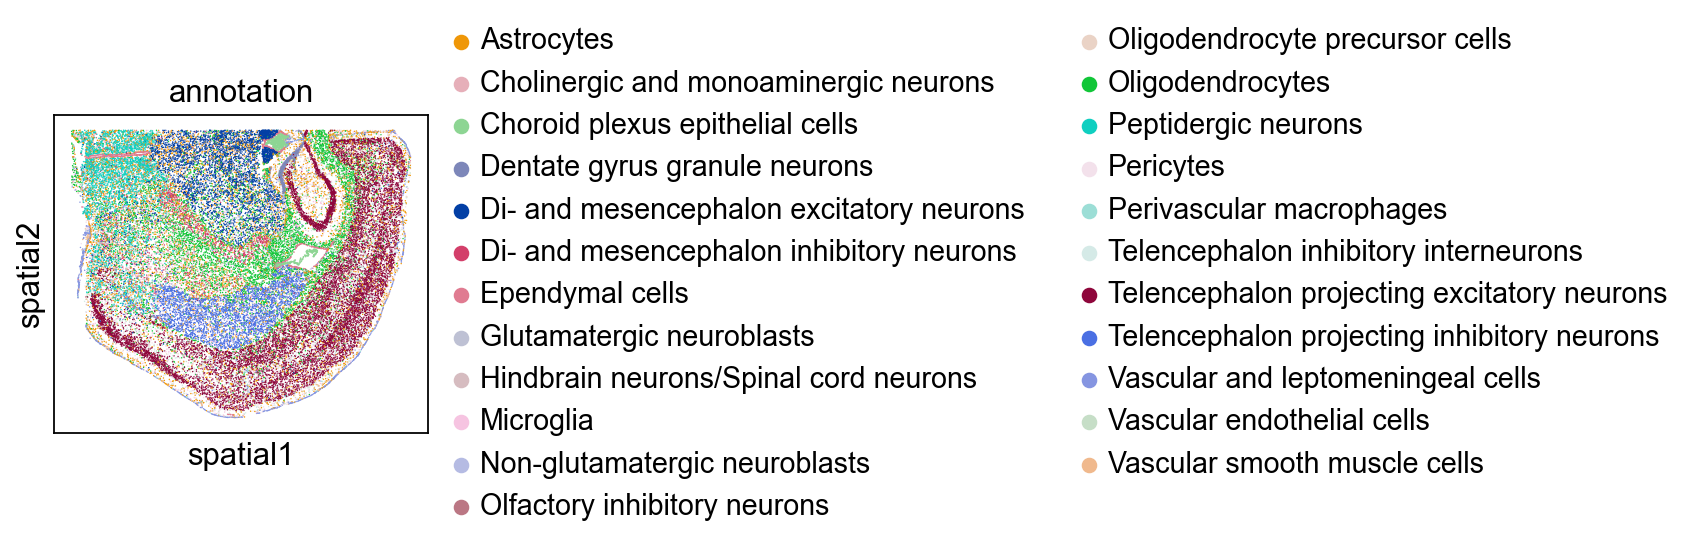

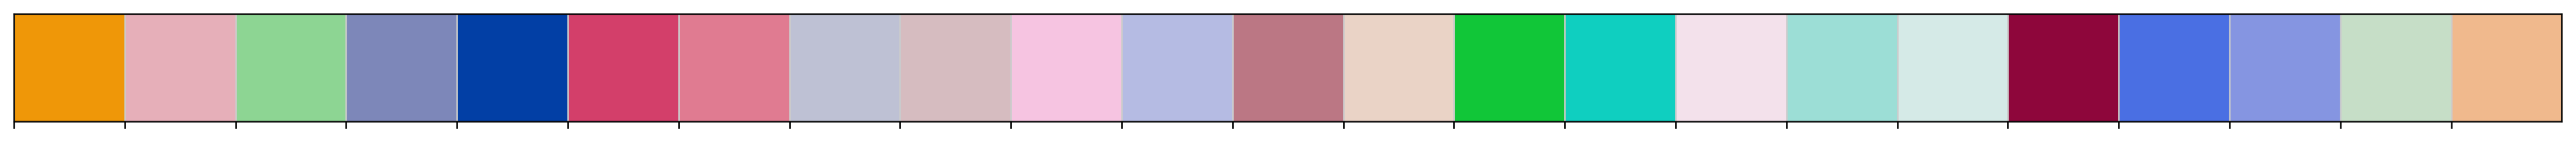

In [6]:
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=135, palette=palette_spaco)
sns.palplot(palette_spaco)

In [7]:
%%time
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    radius=90,
    n_neighbors=16,
    neighbor_kwargs={'n_cells':3},
)
#color_mapping

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...
CPU times: user 19.6 s, sys: 930 ms, total: 20.5 s
Wall time: 20.1 s


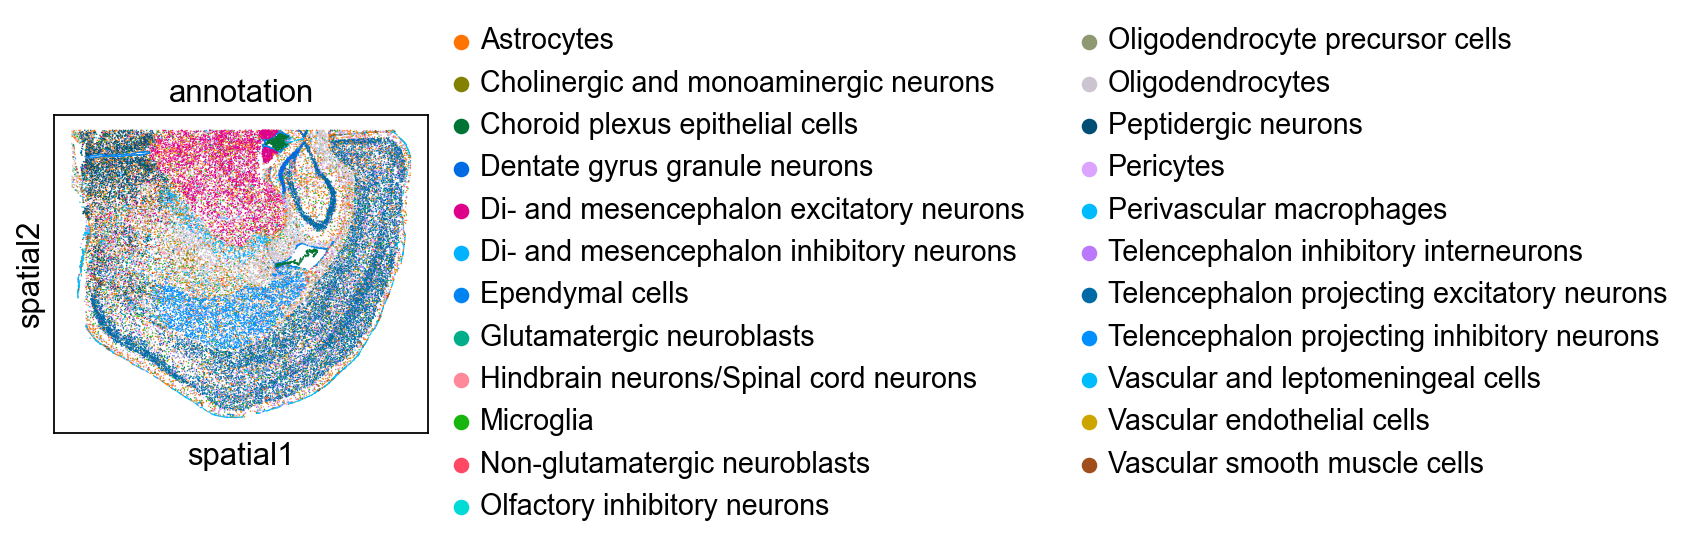

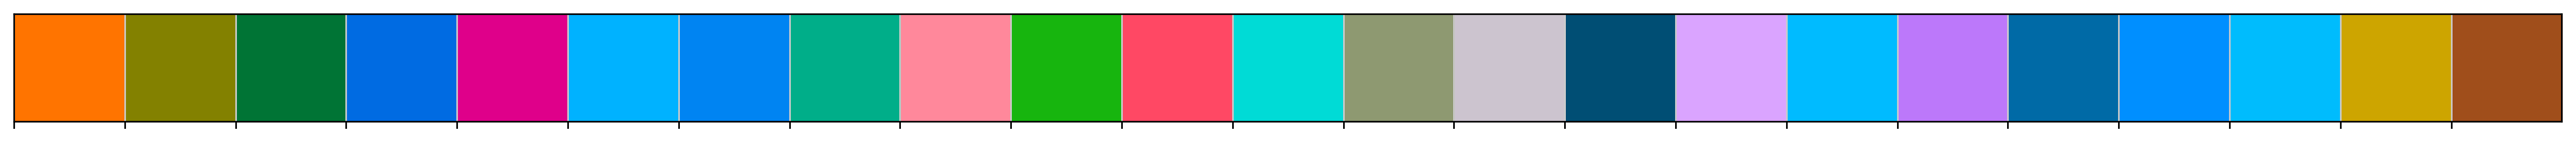

In [8]:
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=135, palette=palette_spaco)
sns.palplot(palette_spaco)

In [9]:
# Sub_molecular_cell_type
adata_cellbin = adata_cellbin_bkp.copy()

adata_cellbin.obs['annotation'] = adata_cellbin.obs['Sub_molecular_cell_type'].copy()
adata_cellbin.obs['annotation'] = adata_cellbin.obs['annotation'].astype(str).astype('category')

min_cells=10
unique_tmp = np.unique(adata_cellbin.obs['annotation'],return_counts=True)
adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation'].isin(unique_tmp[0][unique_tmp[1]>min_cells])].copy()

adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation']!="Unannotated"].copy()

In [10]:
len(np.unique(adata_cellbin.obs['annotation']))

181

In [11]:
%%time
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    radius=500,
    n_neighbors=100,
    neighbor_kwargs={'n_cells':10},
)
#color_mapping

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...
CPU times: user 15.9 s, sys: 220 ms, total: 16.1 s
Wall time: 15.9 s


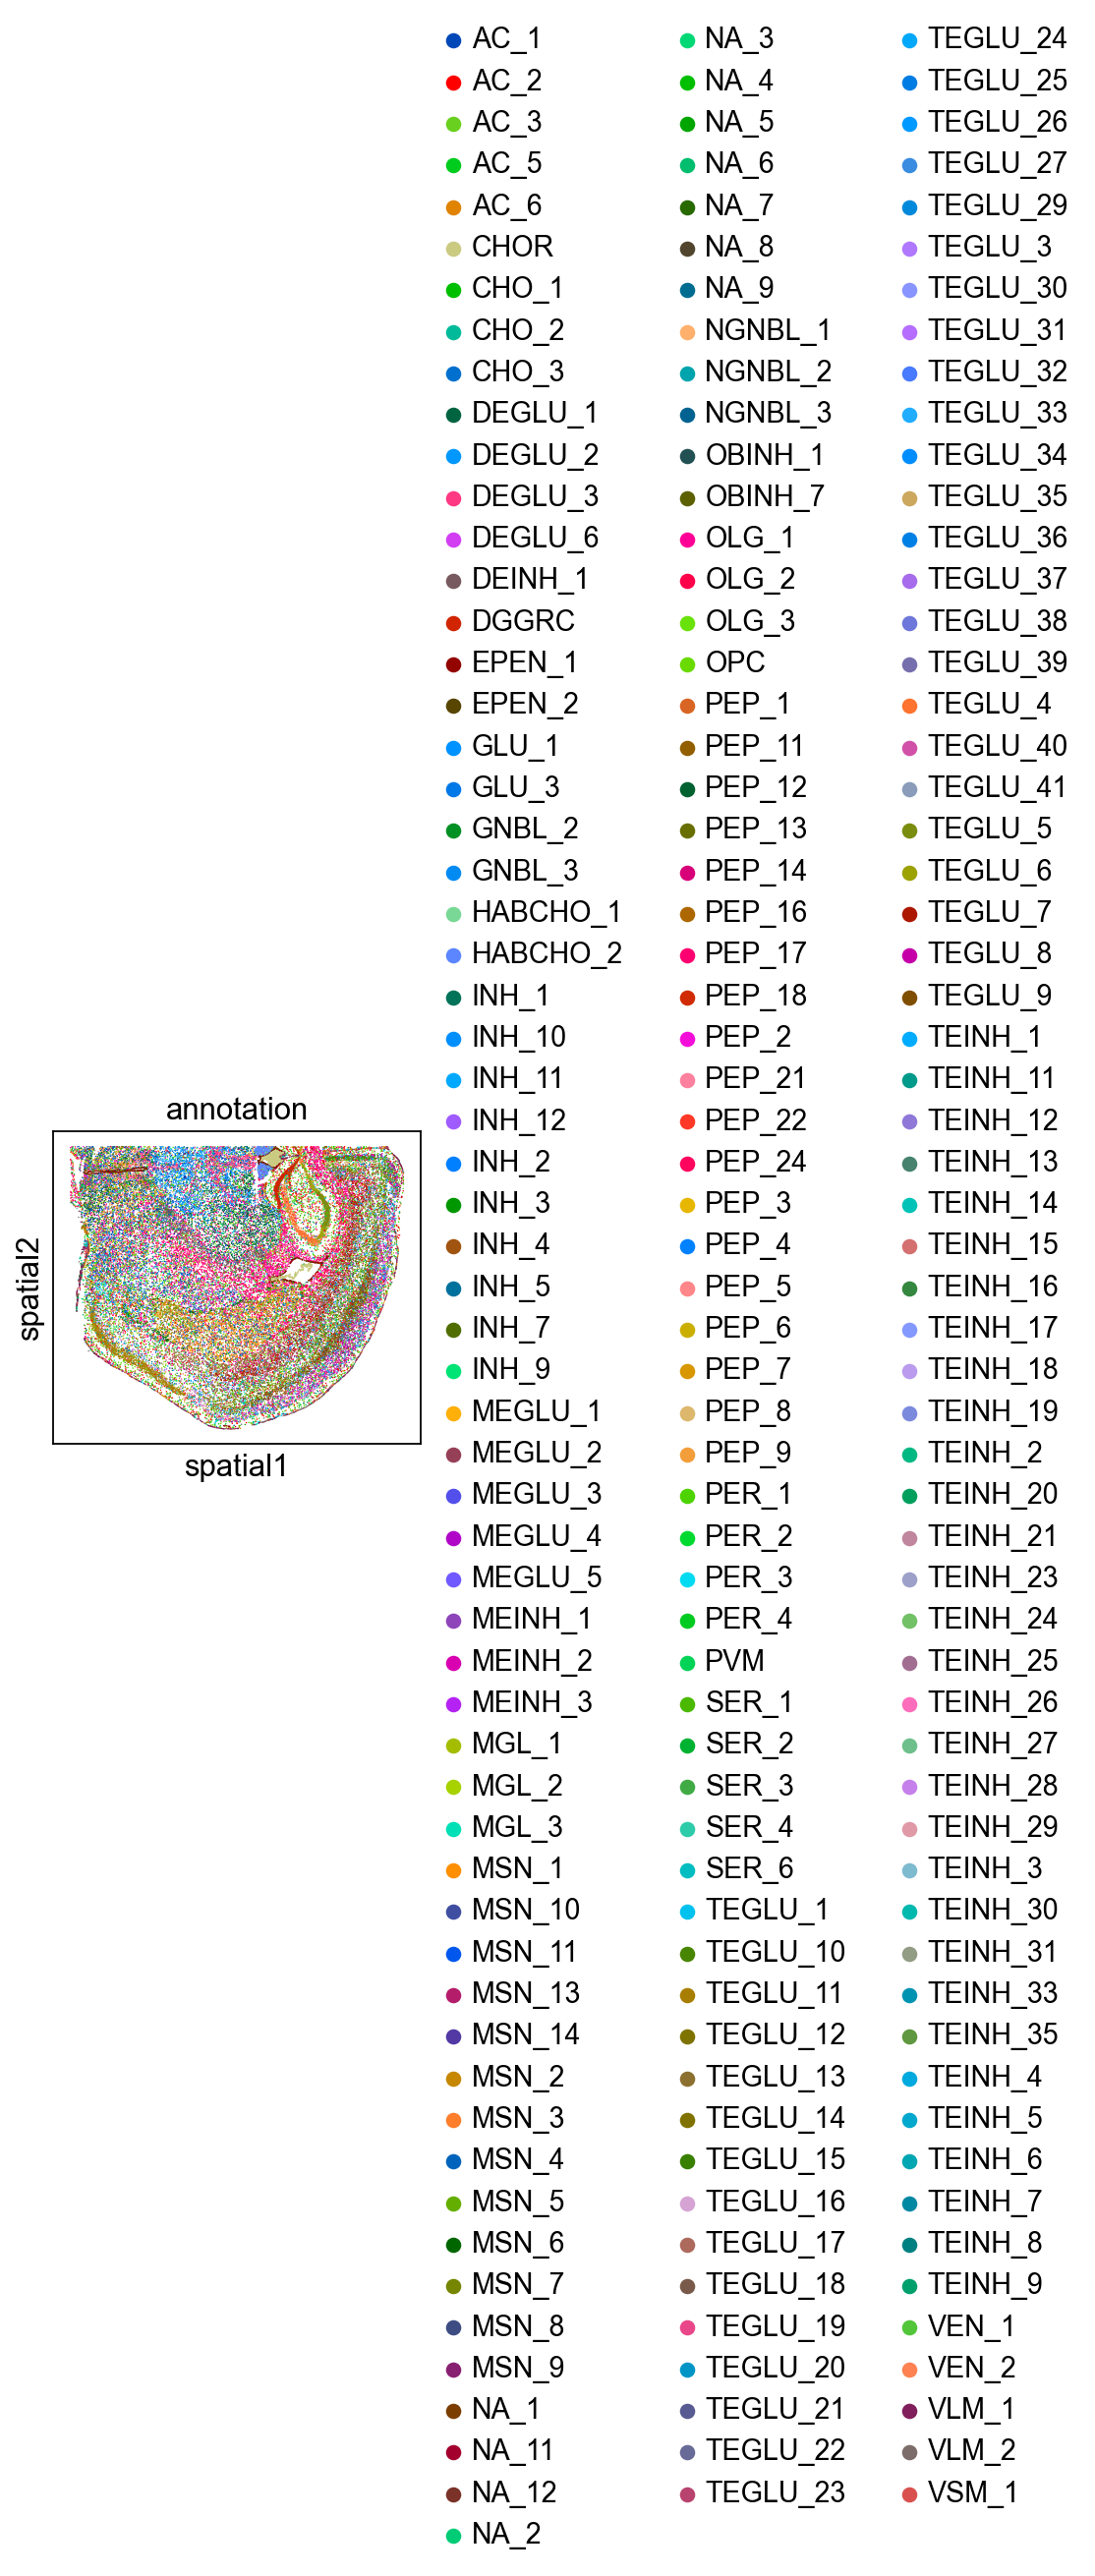

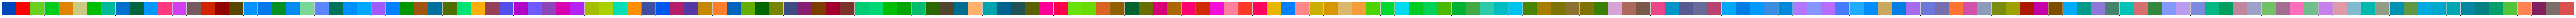

In [ ]:
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=135, palette=palette_spaco)
sns.palplot(palette_spaco)

## Stereo-seq

In [ ]:
adata_cellbin = anndata.read("./data/10DPI_1_left.h5ad")

adata_cellbin.obs['annotation'] = adata_cellbin.obs['Annotation'].copy()

In [ ]:
min_cells=10
unique_tmp = np.unique(adata_cellbin.obs['annotation'],return_counts=True)
adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation'].isin(unique_tmp[0][unique_tmp[1]>min_cells])].copy()

adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation']!="Unannotated"].copy()

In [ ]:
%%time
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    radius=120,
    n_neighbors=35,
)
#color_mapping

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...
CPU times: user 9.19 s, sys: 138 ms, total: 9.33 s
Wall time: 9.36 s


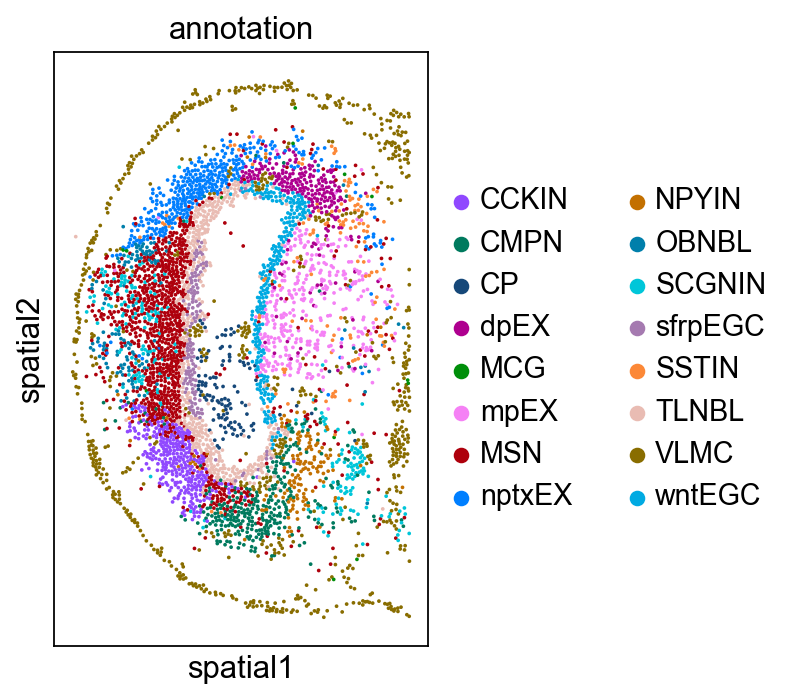

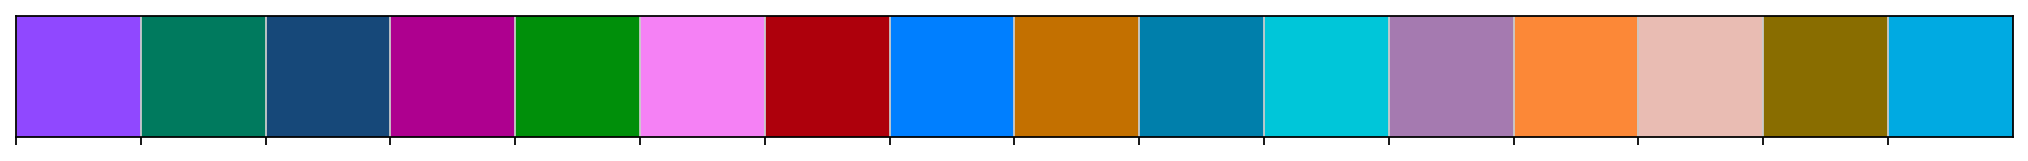

In [12]:
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=35, palette=palette_spaco)
sns.palplot(palette_spaco)

In [13]:
import session_info

session_info.show(excludes=['base','Palo'])